In [1]:
# Import dependencies 
import pandas as pd
import datetime
import seaborn as sns
import matplotlib as plt
from matplotlib import *


## Preprocessing dataframe


In [2]:
# Read in csv
df = pd.read_csv("../archive/us_disaster_declarations.csv")
df


fema_declaration_string  disaster_number state declaration_type  \
0                     DR-1-GA                1    GA               DR   
1                     DR-2-TX                2    TX               DR   
2                     DR-3-LA                3    LA               DR   
3                     DR-4-MI                4    MI               DR   
4                     DR-5-MT                5    MT               DR   
...                       ...              ...   ...              ...   
62107              DR-4610-CA             4610    CA               DR   
62108              DR-4610-CA             4610    CA               DR   
62109              DR-4610-CA             4610    CA               DR   
62110              DR-4610-CA             4610    CA               DR   
62111              FM-5416-CA             5416    CA               FM   

           declaration_date  fy_declared incident_type  \
0      1953-05-02T00:00:00Z         1953       Tornado   
1      1953-05-15T00:00:00Z         1953       Tornado   
2      1953-05-29T00:00:00Z         1953         Flood   
3      1953-06-02T00:00:00Z         1953       Tornado   
4      1953-06-06T00:00:00Z         1953         Flood   
...                     ...          ...           ...   
62107  2021-08-24T20:45:00Z         2021          Fire   
62108  2021-08-24T20:45:00Z         2021          Fire   
62109  2021-08-24T20:45:00Z         2021          Fire   
62110  2021-08-24T20:45:00Z         2021          Fire   
62111  2021-08-25T00:53:00Z         2021          Fire   

              declaration_title  ih_program_declared  ia_program_declared  \
0                       Tornado                    0                    1   
1      Tornado & Heavy Rainfall                    0                    1   
2                         Flood                    0                    1   
3                       Tornado                    0                    1   
4                        Floods                    0                    1   
...                         ...                  ...                  ...   
62107                 Wildfires                    1                    0   
62108                 Wildfires                    1                    0   
62109                 Wildfires                    1                    0   
62110                 Wildfires                    1                    0   
62111               French Fire                    0                    0   

       ...   incident_begin_date     incident_end_date disaster_closeout_date  \
0      ...  1953-05-02T00:00:00Z  1953-05-02T00:00:00Z   1954-06-01T00:00:00Z   
1      ...  1953-05-15T00:00:00Z  1953-05-15T00:00:00Z   1958-01-01T00:00:00Z   
2      ...  1953-05-29T00:00:00Z  1953-05-29T00:00:00Z   1960-02-01T00:00:00Z   
3      ...  1953-06-02T00:00:00Z  1953-06-02T00:00:00Z   1956-02-01T00:00:00Z   
4      ...  1953-06-06T00:00:00Z  1953-06-06T00:00:00Z   1955-12-01T00:00:00Z   
...    ...                   ...                   ...                    ...   
62107  ...  2021-07-14T00:00:00Z                   NaN                    NaN   
62108  ...  2021-07-14T00:00:00Z                   NaN                    NaN   
62109  ...  2021-07-14T00:00:00Z                   NaN                    NaN   
62110  ...  2021-07-14T00:00:00Z                   NaN                    NaN   
62111  ...  2021-08-24T23:22:00Z                   NaN                    NaN   

        fips place_code  designated_area  declaration_request_number  \
0      13000          0        Statewide                       53013   
1      48000          0        Statewide                       53003   
2      22000          0        Statewide                       53005   
3      26000          0        Statewide                       53004   
4      30000          0        Statewide                       53006   
...      ...        ...              ...                         ...   
62107   6063      99063  Pluma

In [3]:
#change date format
df["declaration_date"] = pd.to_datetime(df["declaration_date"]).dt.date

In [4]:
df.tail()

fema_declaration_string  disaster_number state declaration_type  \
62107              DR-4610-CA             4610    CA               DR   
62108              DR-4610-CA             4610    CA               DR   
62109              DR-4610-CA             4610    CA               DR   
62110              DR-4610-CA             4610    CA               DR   
62111              FM-5416-CA             5416    CA               FM   

      declaration_date  fy_declared incident_type declaration_title  \
62107       2021-08-24         2021          Fire         Wildfires   
62108       2021-08-24         2021          Fire         Wildfires   
62109       2021-08-24         2021          Fire         Wildfires   
62110       2021-08-24         2021          Fire         Wildfires   
62111       2021-08-25         2021          Fire       French Fire   

       ih_program_declared  ia_program_declared  ...   incident_begin_date  \
62107                    1                    0  ...  2021-07-14T00:00:00Z   
62108                    1                    0  ...  2021-07-14T00:00:00Z   
62109                    1                    0  ...  2021-07-14T00:00:00Z   
62110                    1                    0  ...  2021-07-14T00:00:00Z   
62111                    0                    0  ...  2021-08-24T23:22:00Z   

       incident_end_date disaster_closeout_date  fips place_code  \
62107                NaN                    NaN  6063      99063   
62108                NaN                    NaN  6061      99061   
62109                NaN                    NaN  6035      99035   
62110                NaN                    NaN  6057      99057   
62111                NaN                    NaN  6029      99029   

       designated_area  declaration_request_number  \
62107  Plumas (County)                       21087   
62108  Placer (County)                       21087   
62109  Lassen (County)                       21087   
62110  Nevada (County)                       21087   
62111    Kern (County)                       21088   

                                           hash          last_refresh  \
62107  d615785ddbaca2e0dbb66805d84246680c86f560  2021-08-25T02:21:43Z   
62108  6e1ab1c91a9838148684d35413b598c5ea66df71  2021-08-25T02:21:43Z   
62109  74f77c93f158659bf1dd9f871227a9993244478d  2021-08-25T02:21:43Z   
62110  dde89f65556f220034ac16cfa66abf7d135962da  2021-08-25T02:21:43Z   
62111  b2120fdada11e2ceefe3714927afe2443c719812  2021-08-25T16:22:54Z   

                             id  
62107  6125a937434e34d5ee5cd8af  
62108  6125a937434e34d5ee5cd8b6  
62109  6125a937434e34d5ee5cd8a3  
62110  6125a937434e34d5ee5cd8c1  
62111  61266e5e434e34d5eee6f25e  

[5 rows x 22 columns]

In [5]:
df["declaration_date"] = pd.to_datetime(df["declaration_date"])

In [6]:
df["incident_begin_date"] = pd.to_datetime(df["incident_begin_date"]).dt.date

In [7]:
df["incident_begin_date"] = pd.to_datetime(df["incident_begin_date"])

In [8]:
df.dtypes

fema_declaration_string               object
disaster_number                        int64
state                                 object
declaration_type                      object
declaration_date              datetime64[ns]
fy_declared                            int64
incident_type                         object
declaration_title                     object
ih_program_declared                    int64
ia_program_declared                    int64
pa_program_declared                    int64
hm_program_declared                    int64
incident_begin_date           datetime64[ns]
incident_end_date                     object
disaster_closeout_date                object
fips                                   int64
place_code                             int64
designated_area                       object
declaration_request_number             int64
hash                                  object
last_refresh                          object
id                                    object
dtype: obj

In [9]:
df.isna().sum()

fema_declaration_string           0
disaster_number                   0
state                             0
declaration_type                  0
declaration_date                  0
fy_declared                       0
incident_type                     0
declaration_title                 0
ih_program_declared               0
ia_program_declared               0
pa_program_declared               0
hm_program_declared               0
incident_begin_date               0
incident_end_date              8513
disaster_closeout_date        15239
fips                              0
place_code                        0
designated_area                   0
declaration_request_number        0
hash                              0
last_refresh                      0
id                                0
dtype: int64

In [10]:
# drop columns that do not provide useful information (mostly nulls)
df = df.drop(["incident_end_date", "disaster_closeout_date"], axis=1)

In [11]:
df.isna().sum()

fema_declaration_string       0
disaster_number               0
state                         0
declaration_type              0
declaration_date              0
fy_declared                   0
incident_type                 0
declaration_title             0
ih_program_declared           0
ia_program_declared           0
pa_program_declared           0
hm_program_declared           0
incident_begin_date           0
fips                          0
place_code                    0
designated_area               0
declaration_request_number    0
hash                          0
last_refresh                  0
id                            0
dtype: int64

In [12]:
# Number of natural diasters by state
df.groupby(["state"]).size()

state
AK     302
AL    1650
AR    1588
AS      75
AZ     327
CA    1455
CO     644
CT     248
DC      23
DE      52
FL    2088
FM      31
GA    2269
GU      19
HI      98
IA    1823
ID     357
IL    1268
IN    1451
KS    1682
KY    2511
LA    2301
MA     393
MD     448
ME    1010
MH      53
MI     793
MN    1498
MO    2670
MP      63
MS    1736
MT     597
NC    1984
ND    1303
NE    1423
NH     294
NJ     583
NM     500
NV     273
NY    1448
OH    1281
OK    2461
OR     583
PA    1226
PR    1826
PW       1
RI     108
SC     855
SD    1382
TN    1565
TX    5164
UT     249
VA    2493
VI      79
VT     328
WA     930
WI     892
WV    1230
WY     128
dtype: int64

In [13]:
#59 states? - incudles US territories
len(df.groupby(["state"]).size())

59

In [14]:
# number of incidents by type
df.groupby(["incident_type"]).size()

incident_type
Biological           7853
Chemical                9
Coastal Storm         570
Dam/Levee Break        13
Drought              1292
Earthquake            227
Fire                 3547
Fishing Losses         42
Flood               10461
Freezing              301
Human Cause             7
Hurricane           12085
Mud/Landslide          36
Other                 306
Severe Ice Storm     2942
Severe Storm(s)     17065
Snow                 3664
Terrorist               5
Tornado              1488
Toxic Substances        9
Tsunami                 9
Typhoon               130
Volcano                51
dtype: int64

In [15]:
df.drop(df[df["incident_type"]=="Other"].index, inplace = True)

In [16]:
df.groupby(["incident_type"]).size()

incident_type
Biological           7853
Chemical                9
Coastal Storm         570
Dam/Levee Break        13
Drought              1292
Earthquake            227
Fire                 3547
Fishing Losses         42
Flood               10461
Freezing              301
Human Cause             7
Hurricane           12085
Mud/Landslide          36
Severe Ice Storm     2942
Severe Storm(s)     17065
Snow                 3664
Terrorist               5
Tornado              1488
Toxic Substances        9
Tsunami                 9
Typhoon               130
Volcano                51
dtype: int64

In [17]:
df.to_csv("diaster_data_clean.csv", index = False)

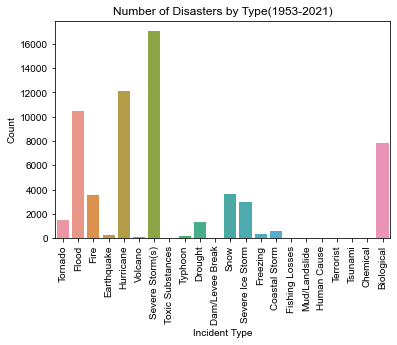

In [18]:
# Number of disasters by type
ax = sns.countplot(data = df, x = 'incident_type')
sns.set(rc = {'figure.figsize':(15,8)})
sns.set_theme(style="white")
ax.set(xlabel = 'Incident Type', ylabel='Count', title = "Number of Disasters by Type(1953-2021)")
ax.tick_params(axis='x', rotation=90)
ax.figure.savefig('incident_counts.png')

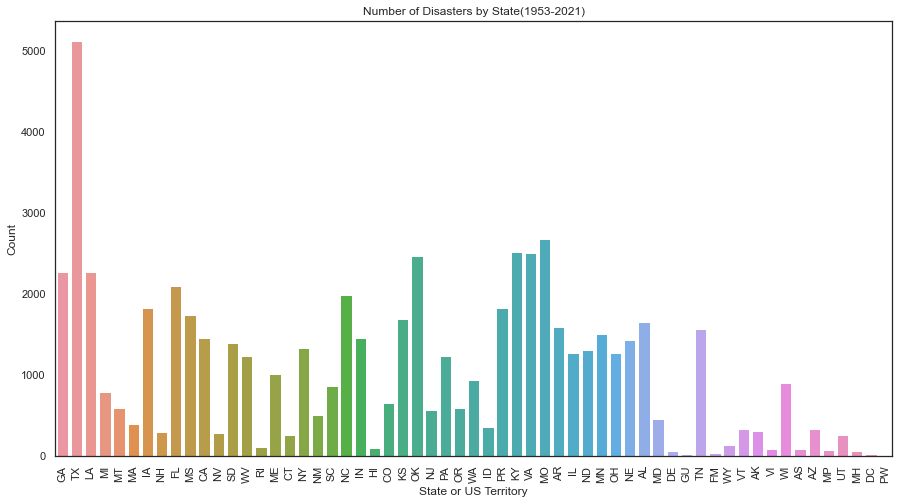

In [19]:
# Number of disasters by state/territories
ax = sns.countplot(data = df, x = 'state')
sns.set(rc = {'figure.figsize':(15,8)})
sns.set_theme(style="white")
ax.set(xlabel = 'State or US Territory', ylabel='Count', title = "Number of Disasters by State(1953-2021)")
ax.tick_params(axis='x', rotation=90)
ax.figure.savefig('incident_counts_by_state.png')

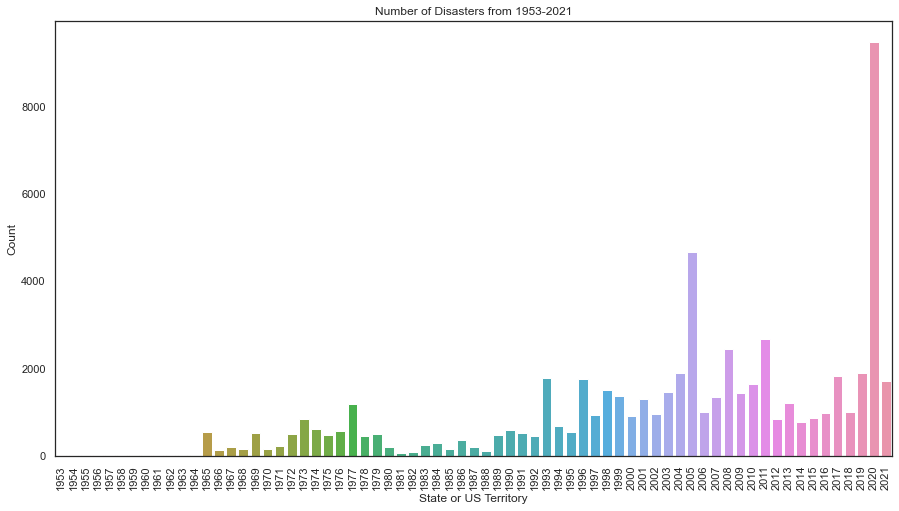

In [20]:
# Number of incidents over time
ax = sns.countplot(data = df, x = 'fy_declared')
sns.set(rc = {'figure.figsize':(15,8)})
sns.set_theme(style="white")
ax.set(xlabel = 'State or US Territory', ylabel='Count', title = "Number of Disasters from 1953-2021")
ax.tick_params(axis='x', rotation=90)
ax.figure.savefig('incident_counts_over_time.png')

In [21]:
#dataframe of most frequent disasters per state
df_freq = df[['state','incident_type']].groupby('state').describe()
df_freq ['incident_type'].sort_values(by='count',ascending=False).head(50)

count unique              top  freq
state                                    
TX     5108     10        Hurricane  1303
MO     2670      8  Severe Storm(s)  1309
KY     2510      9  Severe Storm(s)   986
VA     2493     11        Hurricane   877
OK     2461      9  Severe Storm(s)   996
GA     2269     10        Hurricane   905
LA     2260     10        Hurricane  1236
FL     2086      9        Hurricane  1012
NC     1984     10        Hurricane  1192
PR     1825      7        Hurricane   868
IA     1823      8            Flood   722
MS     1736      8  Severe Storm(s)   638
KS     1680      8  Severe Storm(s)   975
AL     1650      8        Hurricane   611
AR     1588      8  Severe Storm(s)   633
TN     1564      8  Severe Storm(s)   742
MN     1497      9            Flood   642
CA     1454     12             Fire   445
IN     1451      7  Severe Storm(s)   655
NE     1423      9  Severe Storm(s)   630
SD     1382      8  Severe Storm(s)   457
NY     1322     12  Severe Storm(s)   368
ND     1303      8            Flood   653
IL     1268      7            Flood   316
OH     1267      7  Severe Storm(s)   566
WV     1230     10  Severe Storm(s)   460
PA     1226      8            Flood   349
ME     1010      9       Biological   623
WA      930     11            Flood   255
WI      892      8  Severe Storm(s)   293
SC      855      8        Hurricane   449
MI      779     11       Biological   188
CO      644      9             Fire   149
MT      591      8             Fire   147
OR      583      9  Severe Storm(s)   158
NJ      557      9        Hurricane   151
NM      500      6       Biological   150
MD      448      6        Hurricane   151
MA      389     11        Hurricane    94
ID      357      9       Biological    93
VT      328      7  Severe Storm(s)   145
AZ      327      7             Fire    85
AK      298      9       Biological   121
NH      294      8  Severe Storm(s)   108
NV      273      8       Biological    88
UT      249      8            Flood    73
CT      248      6        Hurricane    89
WY      128      8       Biological    48
RI      106      5        Hurricane    43
HI       96     10        Hurricane    22